In [58]:
import pandas as pd
from prophet import Prophet
from plotly import graph_objects as go

In [39]:
df = pd.read_csv('rnn_dataset_with_weather.csv', sep="\t", header=None)

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-10-19T00:00:00,2,0,0,2,3,1,1,2,1,3,0.0
1,2021-10-19T15:15:00,0,0,12,6,6,6,6,7,7,9,0.0
2,2021-10-19T15:30:00,0,0,11,3,6,5,7,9,7,6,0.0
3,2021-10-19T15:45:00,0,0,9,9,6,7,5,6,9,4,0.0
4,2021-10-19T16:15:00,0,0,6,4,6,3,6,7,4,4,0.0


In [41]:
df = df[[0, 10]]
df = df.rename(columns = {0:'ds', 10:'y'})

In [42]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%dT%H:%M:%S')

In [43]:
df.head()

,ds,y
0,2021-10-19 00:00:00,3
1,2021-10-19 15:15:00,9
2,2021-10-19 15:30:00,6
3,2021-10-19 15:45:00,4
4,2021-10-19 16:15:00,4


In [44]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [54]:
future = m.make_future_dataframe(periods=24, freq='H')
future.tail()

,ds
8054,2022-01-29 20:00:00
8055,2022-01-29 21:00:00
8056,2022-01-29 22:00:00
8057,2022-01-29 23:00:00
8058,2022-01-30 00:00:00


In [55]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8054,2022-01-29 20:00:00,4.843122,2.071582,7.683331
8055,2022-01-29 21:00:00,3.501655,0.807637,6.413445
8056,2022-01-29 22:00:00,2.638520,-0.216158,5.401581
8057,2022-01-29 23:00:00,2.428839,-0.296098,5.271480
8058,2022-01-30 00:00:00,2.504483,-0.429957,5.308565


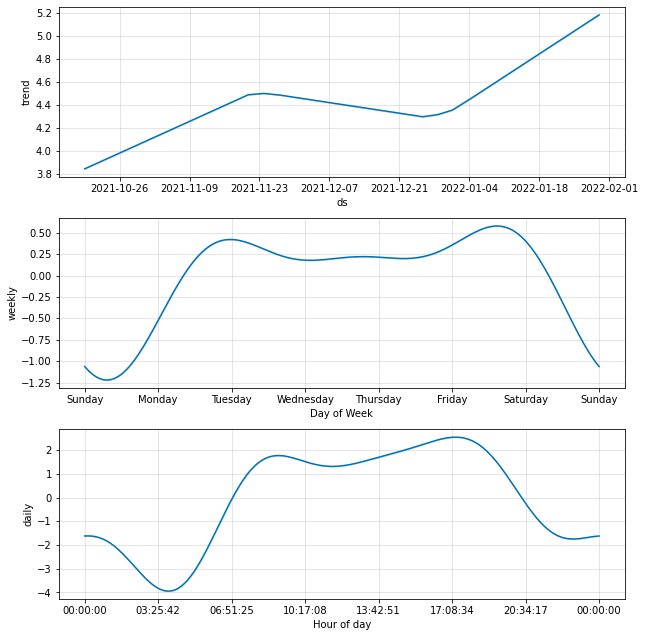

In [61]:
fig = m.plot_components(forecast)

In [75]:
from datetime import datetime

In [73]:
def predict_for_date(date_string):
    to_predict = pd.DataFrame({'ds':datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")}, index=[0])
    return m.predict(to_predict)

In [74]:
predict_for_date('2022-01-30 00:00:00')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-30,5.185128,-0.07948,5.405282,5.185084,5.185272,-2.680645,-2.680645,-2.680645,-1.617959,-1.617959,-1.617959,-1.062686,-1.062686,-1.062686,0.0,0.0,0.0,2.504483
